# <font color='orange'>**Medical Cost Analysis**</font>

## Kütüphanelerin Import Edilmesi

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Veri setinin iceri aktarilmai
data = pd.read_csv("insurance.csv")

In [11]:
# Veri setinin yedeginin alinmasi
df = data.copy()

## Veri Analizi

In [12]:
# Veri setinin ilk 5 gozlem degerlerine bakis
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
# Veri setinin son 5 gozlem degerlerine bakis
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [16]:
# Veri setinin boyutuna bakis
df.shape

(1338, 7)

In [17]:
# Veri setinin özelliklerinin veri tiplerine bakis
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [18]:
# Ozelliklerin benzersiz degerlerine bakis
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [19]:
# Degiskenlerin null yani bos degerlerinin sorgulanmasi
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [20]:
# Verisetinin betimsel istatistiklerine bakis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Verilerin Görselleştirilmesi

### Vücut Kitle İndeksi

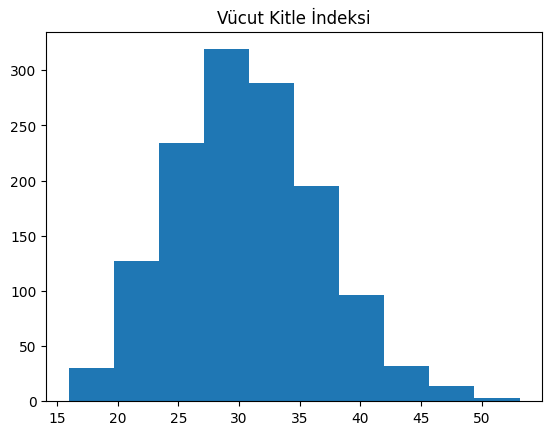

In [21]:
# Histogram Grafigi
plt.hist(data=df, x='bmi')
plt.title('Vücut Kitle İndeksi')
plt.show()

### Sigara İçenler ve Maliyetleri Arasındaki İlişki

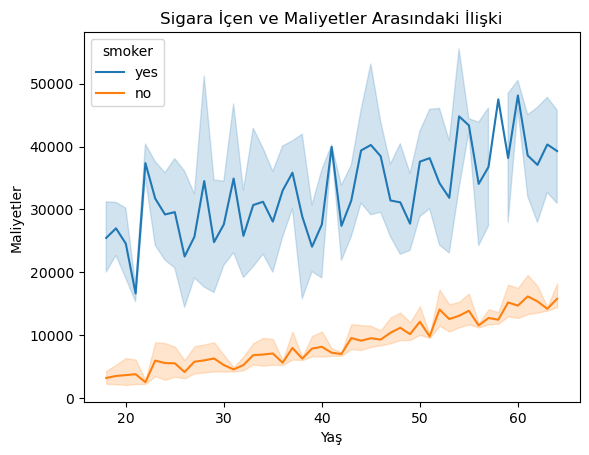

In [12]:
sns.lineplot(data=df, x='age', y='charges', hue='smoker')
plt.title('Sigara İçen ve Maliyetler Arasındaki İlişki')
plt.xlabel('Yaş')
plt.ylabel('Maliyetler')
plt.show()

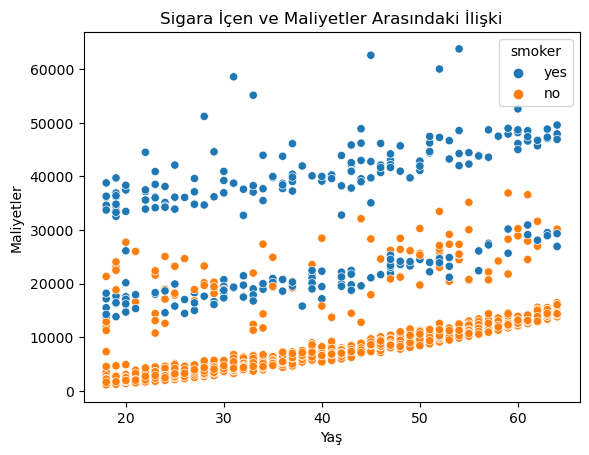

In [13]:
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title('Sigara İçen ve Maliyetler Arasındaki İlişki')
plt.xlabel('Yaş')
plt.ylabel('Maliyetler')
plt.show()

### Sigara İçenlerin Bölgelere Göre Dağılımı

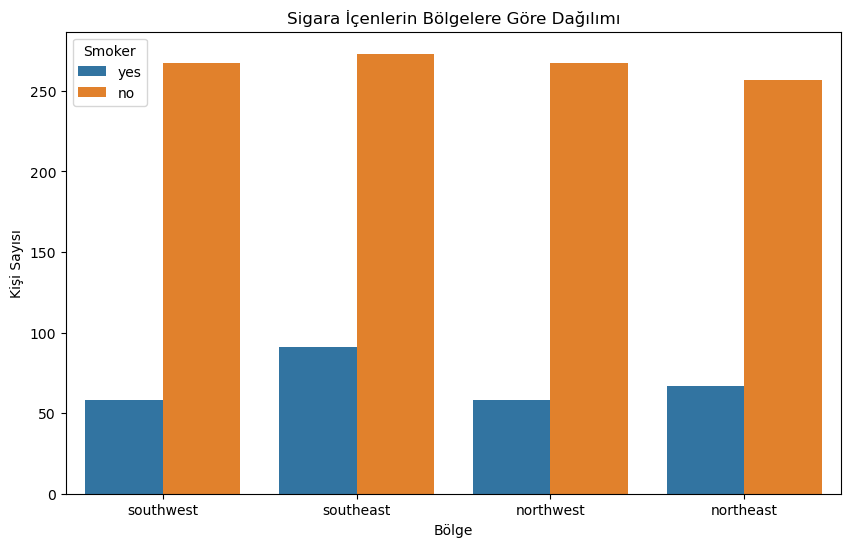

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='region', hue='smoker')
plt.title('Sigara İçenlerin Bölgelere Göre Dağılımı')
plt.xlabel('Bölge')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Smoker')
plt.show()

### Cinsiyete Göre BMI Dağılımı

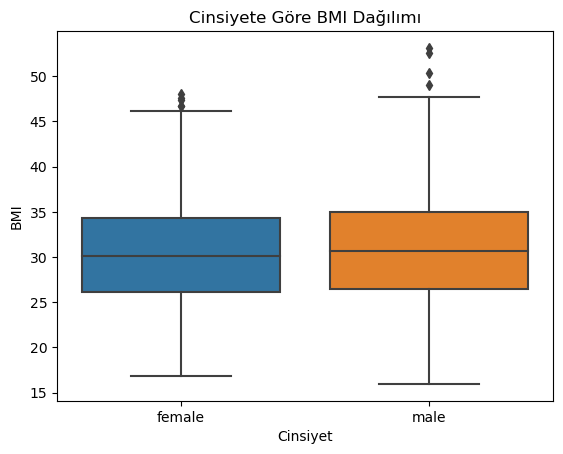

In [15]:
sns.boxplot(data=df, x='sex', y='bmi')
plt.title('Cinsiyete Göre BMI Dağılımı')
plt.xlabel('Cinsiyet')
plt.ylabel('BMI')
plt.show()

### Çocuk Sayısının Bölgelere Göre Dağılımı

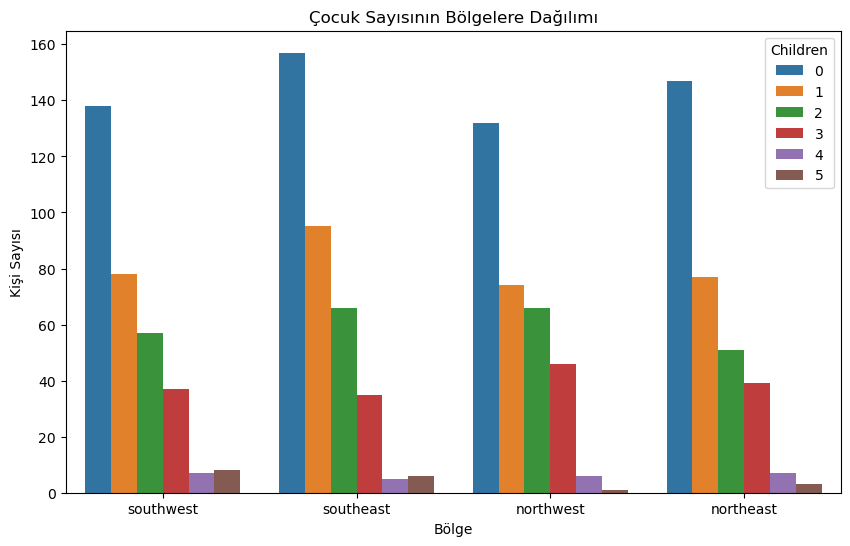

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='region', hue='children')
plt.title('Çocuk Sayısının Bölgelere Dağılımı')
plt.xlabel('Bölge')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Children')
plt.show()

In [17]:
children_by_region = df.groupby('region')['children'].sum().reset_index()
max_children_region = children_by_region.loc[children_by_region['children'].idxmax()]['region']
print("En fazla çocuk sayısına sahip bölge:", max_children_region)

En fazla çocuk sayısına sahip bölge: southeast


### Yaş ve BMI Arasındaki İlişki

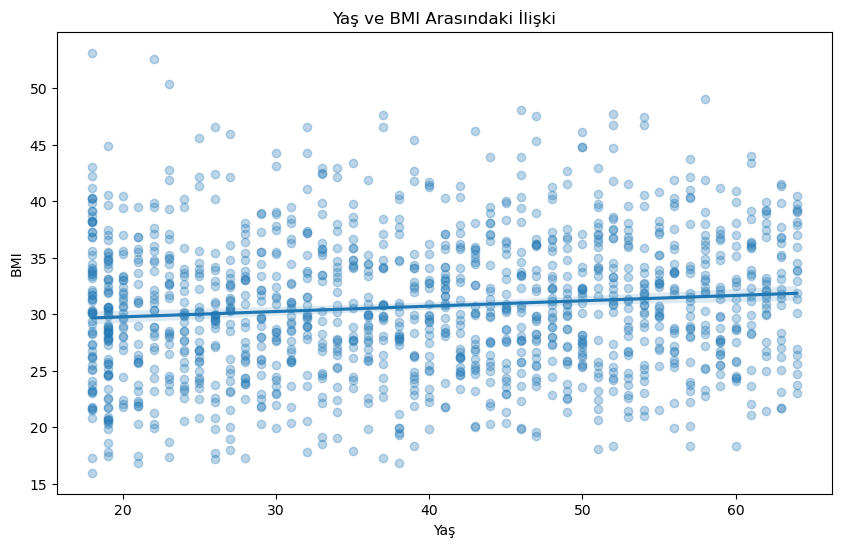

In [18]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='age', y='bmi', scatter_kws={'alpha':0.3})
plt.title('Yaş ve BMI Arasındaki İlişki')
plt.xlabel('Yaş')
plt.ylabel('BMI')
plt.show()

### BMI ve Çocuk Sayısı Arasındaki İLişki

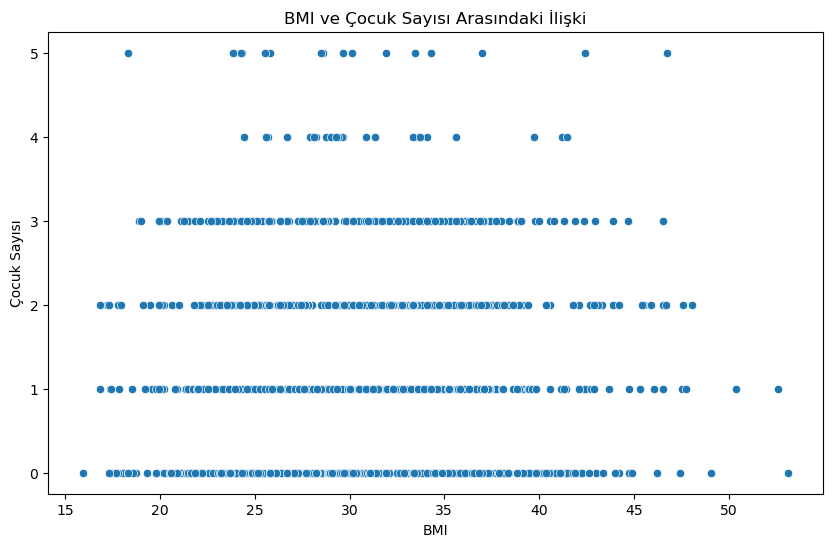

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='children')
plt.title('BMI ve Çocuk Sayısı Arasındaki İlişki')
plt.xlabel('BMI')
plt.ylabel('Çocuk Sayısı')
plt.show()

### BMI Değişkenindeki Aykırı Değerler

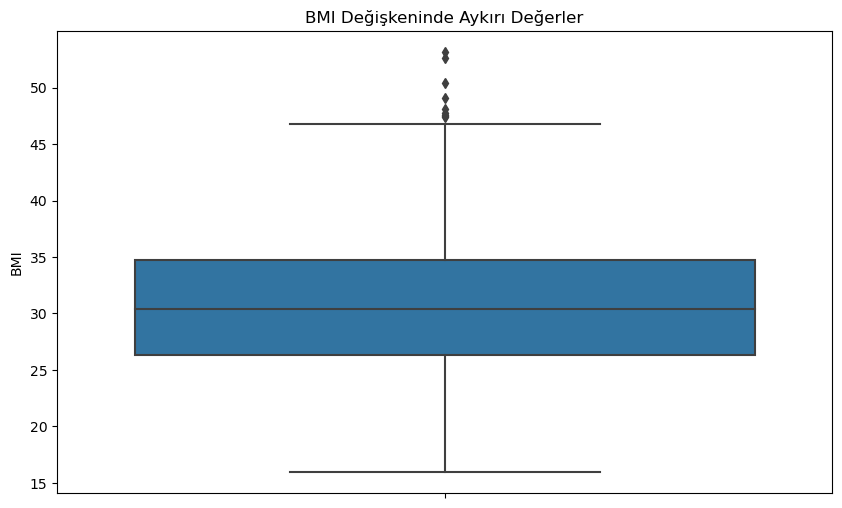

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='bmi')
plt.title('BMI Değişkeninde Aykırı Değerler')
plt.ylabel('BMI')
plt.show()

### BMI ve Maliyetler Arasındaki İlişki

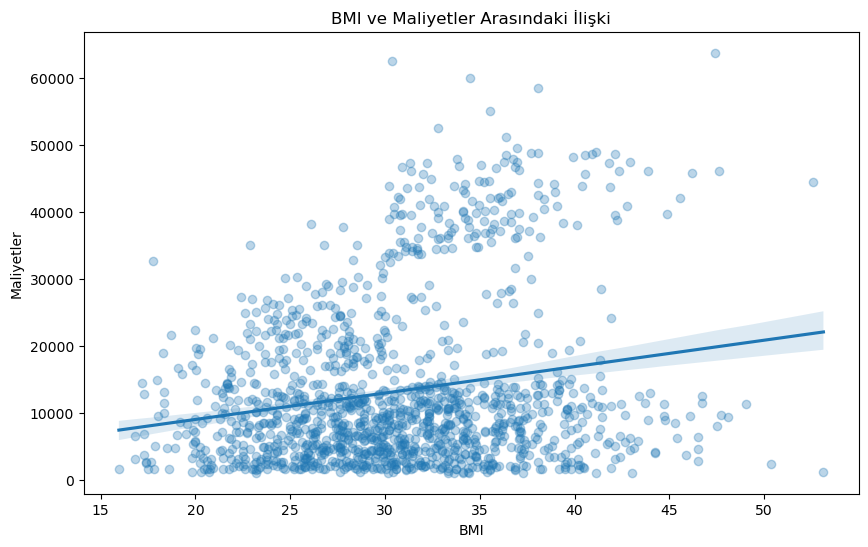

In [21]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='bmi', y='charges', scatter_kws={'alpha':0.3})
plt.title('BMI ve Maliyetler Arasındaki İlişki')
plt.xlabel('BMI')
plt.ylabel('Maliyetler')
plt.show()

### Bölge, Sigara İçen ve BMI Arasındaki İlişki

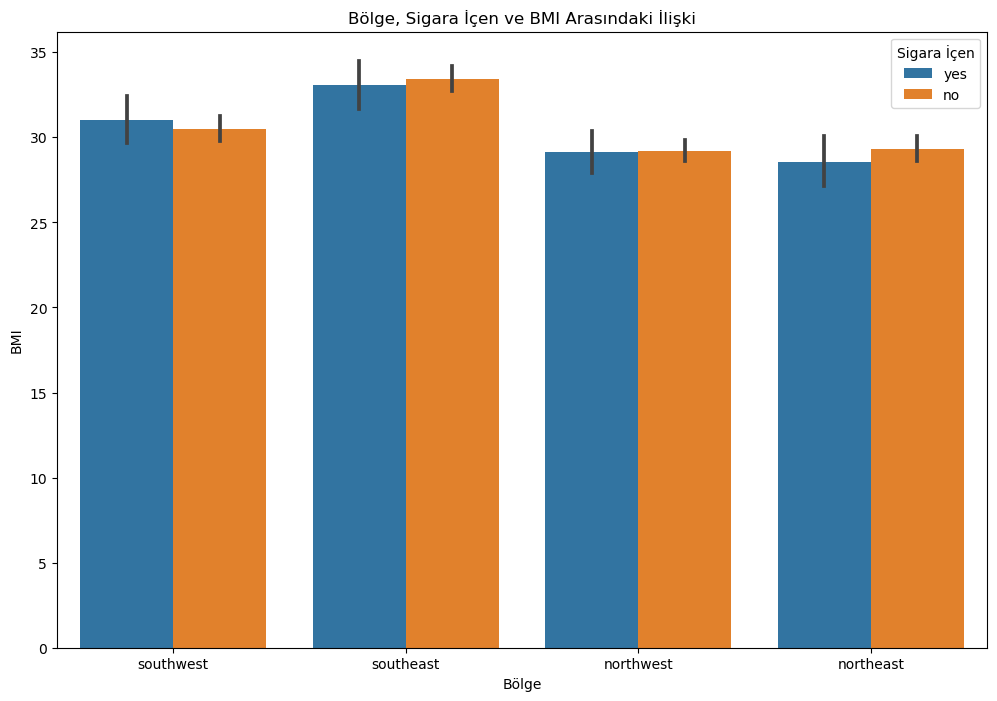

In [22]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='region', y='bmi', hue='smoker')
plt.title('Bölge, Sigara İçen ve BMI Arasındaki İlişki')
plt.xlabel('Bölge')
plt.ylabel('BMI')
plt.legend(title='Sigara İçen')
plt.show()

## Veri Önişleme

In [23]:
sex_replace = {"male": 0, "female": 1}
df['sex'] = df['sex'].replace(sex_replace)

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [25]:
smoker_replace = {"yes": 0, "no": 1}
df["smoker"] = df["smoker"].replace(smoker_replace)

In [26]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,0,30.97,3,1,northwest,10600.5483
1334,18,1,31.92,0,1,northeast,2205.9808
1335,18,1,36.85,0,1,southeast,1629.8335
1336,21,1,25.80,0,1,southwest,2007.9450
1337,61,1,29.07,0,0,northwest,29141.3603


In [27]:
region_replace ={"southeast": 0, "southwest": 1, "northeast": 2, "northwest": 3}
df["region"] = df["region"].replace(region_replace)

In [28]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


## Model Eğitimi

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df.drop("charges",axis=1)
y = df["charges"]

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,
                                                random_state=100)

### Linear Regression

In [91]:
"""Linear Regression (Lineer Regresyon): Sürekli sayısal hedef değişkenlerini tahmin etmek için kullanılır."""

'Linear Regression (Lineer Regresyon): Sürekli sayısal hedef değişkenlerini tahmin etmek için kullanılır.'

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [33]:
lr = LinearRegression()

In [34]:
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = lr.predict(X_test)

In [36]:
r2 = r2_score(y_test, y_pred)
print("R2 Skoru:", r2)

R2 Skoru: 0.7822702519020529


In [37]:
correlation = np.corrcoef(y_pred, y_test)[0, 1]
print("Korelasyon Katsayısı:", correlation)

Korelasyon Katsayısı: 0.8847207963408681


### Polynomial Regression

In [85]:
"""
Polynomial Regression (Polinomiyal Regresyon):
Lineer regresyonun polinomlarla genişletilmiş hali olarak karmaşık ilişkileri modellemek için kullanılır.
"""

'\nPolynomial Regression (Polinomiyal Regresyon):\nLineer regresyonun polinomlarla genişletilmiş hali olarak karmaşık ilişkileri modellemek için kullanılır.\n'

In [38]:
from sklearn.preprocessing import PolynomialFeatures


In [39]:
degree = 2  # Polinom derecesi

In [40]:
poly = PolynomialFeatures(degree)

In [41]:
X_train_poly = poly.fit_transform(X_train)

In [42]:
X_test_poly = poly.transform(X_test)

In [43]:
pr = LinearRegression()

In [44]:
pr.fit(X_train_poly, y_train)

LinearRegression()

In [45]:
y_pred = pr.predict(X_test_poly)

In [46]:
r2 = r2_score(y_test, y_pred)
print(f"R-kare Skoru: {r2}")

R-kare Skoru: 0.855806010703044


In [47]:
correlation = np.corrcoef(y_pred, y_test)[0, 1]
print("Korelasyon Katsayısı:", correlation)

Korelasyon Katsayısı: 0.9252323124231413


### Random Forrest Regressor

In [86]:
"""
Random Forest Regression: Birden fazla karar ağacını birleştirerek sürekli sayısal tahminler yapar.
"""

'\nRandom Forest Regression: Birden fazla karar ağacını birleştirerek sürekli sayısal tahminler yapar.\n'

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
model = RandomForestRegressor(random_state=100)

In [50]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=100)

In [51]:
y_pred = model.predict(X_test)

In [52]:
r2 = r2_score(y_test, y_pred)
print("R2 Skoru:", r2)

R2 Skoru: 0.8608291277938687


In [53]:
correlation = np.corrcoef(y_pred, y_test)[0, 1]
print("Korelasyon Katsayısı:", correlation)

Korelasyon Katsayısı: 0.9309998502804178


### Support Vector Regression

In [87]:
"""
Support Vector Regression (Destek Vektör Regresyonu): Sürekli sayısal tahminler yapmak için kullanılır.
"""

'\nSupport Vector Regression (Destek Vektör Regresyonu): Sürekli sayısal tahminler yapmak için kullanılır.\n'

In [54]:
from sklearn.svm import SVR

In [55]:
svr = SVR()

In [56]:
svr.fit(X_train, y_train)

SVR()

In [57]:
r2 = r2_score(y_test, y_pred)
print("R2 Skoru:", r2)

R2 Skoru: 0.8608291277938687


In [58]:
correlation = np.corrcoef(y_pred, y_test)[0, 1]
print("Korelasyon Katsayısı:", correlation)

Korelasyon Katsayısı: 0.9309998502804178


### Gradient Boosting Regressor

In [88]:
"""
Gradient Boosting Regressor: Zayıf tahmincileri birleştirerek daha güçlü bir regresyon modeli oluşturur.
"""

'\nGradient Boosting Regressor: Zayıf tahmincileri birleştirerek daha güçlü bir regresyon modeli oluşturur.\n'

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

In [60]:
gbr = GradientBoostingRegressor(random_state=100)

In [61]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=100)

In [62]:
y_pred = gbr.predict(X_test)

In [63]:
r2 = r2_score(y_test, y_pred)
print("R2 Skoru:", r2)

R2 Skoru: 0.8913969217476401


In [64]:
correlation = np.corrcoef(y_pred, y_test)[0, 1]
print("Korelasyon Katsayısı:", correlation)

Korelasyon Katsayısı: 0.9444556529944333


### Lasso Regression

In [89]:
"""Lasso and Ridge Regression:
Doğrusal regresyonun düzenleme teknikleridir. Katsayıları sıfıra yaklaştırarak veya küçülterek
model karmaşıklığını kontrol eder."""

'Lasso and Ridge Regression:\nDoğrusal regresyonun düzenleme teknikleridir. Katsayıları sıfıra yaklaştırarak veya küçülterek\nmodel karmaşıklığını kontrol eder.'

In [65]:
from sklearn.linear_model import Lasso

In [66]:
model = Lasso(alpha=0.01)  # alpha parametresi düzenleme terimini kontrol eder

In [67]:
model.fit(X_train, y_train)

Lasso(alpha=0.01)

In [68]:
y_pred = model.predict(X_test)

In [69]:
r2 = r2_score(y_test, y_pred)
print("R2 Skoru:", r2)

R2 Skoru: 0.7822702186734245


In [70]:
correlation = np.corrcoef(y_pred, y_test)[0, 1]
print("Korelasyon Katsayısı:", correlation)

Korelasyon Katsayısı: 0.8847208151248416


### Ridge Regression

In [71]:
from sklearn.linear_model import Ridge

In [72]:
model = Ridge(alpha=0.01)  # alpha parametresi düzenleme terimini kontrol eder

In [73]:
model.fit(X_train, y_train)

Ridge(alpha=0.01)

In [74]:
y_pred = model.predict(X_test)

In [75]:
r2 = r2_score(y_test, y_pred)
print("R2 Skoru:", r2)

R2 Skoru: 0.7822688904692138


In [76]:
correlation = np.corrcoef(y_pred, y_test)[0, 1]
print("Korelasyon Katsayısı:", correlation)

Korelasyon Katsayısı: 0.8847208599332227


### ElasticNet Regression

In [90]:
"""ElasticNet Regression: Lasso ve Ridge regresyonlarının birleşimi olan bir düzenleme tekniğidir."""

'ElasticNet Regression: Lasso ve Ridge regresyonlarının birleşimi olan bir düzenleme tekniğidir.'

In [77]:
from sklearn.linear_model import ElasticNet

In [78]:
# ElasticNet Regresyon modelini oluşturma
model = ElasticNet(alpha=0.01, l1_ratio=0.5)
# alpha: Düzenleme teriminin katsayısı, l1_ratio: L1 ve L2 düzenlemesi arasındaki oran

In [79]:
model.fit(X_train, y_train)

ElasticNet(alpha=0.01)

In [80]:
y_pred = model.predict(X_test)

In [81]:
r2 = r2_score(y_test, y_pred)
print("R2 Skoru:", r2)

R2 Skoru: 0.780953976617671


In [82]:
correlation = np.corrcoef(y_pred, y_test)[0, 1]
print("Korelasyon Katsayısı:", correlation)

Korelasyon Katsayısı: 0.8846869039916331
